<a href="https://colab.research.google.com/github/aymenchibouti/doctorat/blob/main/XGBoost_res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load CSV file
df = pd.read_csv('model1_210_features.csv')

# Drop non-feature columns
X = df.drop(columns=['dropout', 'username', 'course_id', 'enrollment_id'])
y = df['dropout']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
xgb_baseline = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_baseline.fit(X_train, y_train)
y_pred_base = xgb_baseline.predict(X_test)

print("Baseline (No Balancing):")
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:32:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Baseline (No Balancing):
[[ 2501  2491]
 [  898 18219]]
              precision    recall  f1-score   support

           0       0.74      0.50      0.60      4992
           1       0.88      0.95      0.91     19117

    accuracy                           0.86     24109
   macro avg       0.81      0.73      0.76     24109
weighted avg       0.85      0.86      0.85     24109



In [6]:
# Combine training features and target
train_data = pd.concat([X_train, y_train], axis=1)

# Separate classes
majority = train_data[train_data.dropout == 1]
minority = train_data[train_data.dropout == 0]

# Upsample minority class
minority_upsampled = resample(minority, replace=True,
                               n_samples=len(majority), random_state=42)

# Combine back
upsampled_data = pd.concat([majority, minority_upsampled])
X_train_up = upsampled_data.drop("dropout", axis=1)
y_train_up = upsampled_data["dropout"]

# Train model
xgb_upsampled = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_upsampled.fit(X_train_up, y_train_up)
y_pred_up = xgb_upsampled.predict(X_test)

print("Random Oversampling:")
print(confusion_matrix(y_test, y_pred_up))
print(classification_report(y_test, y_pred_up))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:33:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Oversampling:
[[ 3456  1536]
 [ 2608 16509]]
              precision    recall  f1-score   support

           0       0.57      0.69      0.63      4992
           1       0.91      0.86      0.89     19117

    accuracy                           0.83     24109
   macro avg       0.74      0.78      0.76     24109
weighted avg       0.84      0.83      0.83     24109



In [7]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_smote.fit(X_train_sm, y_train_sm)
y_pred_sm = xgb_smote.predict(X_test)

print("SMOTE:")
print(confusion_matrix(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:33:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SMOTE:
[[ 3187  1805]
 [ 2309 16808]]
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      4992
           1       0.90      0.88      0.89     19117

    accuracy                           0.83     24109
   macro avg       0.74      0.76      0.75     24109
weighted avg       0.84      0.83      0.83     24109



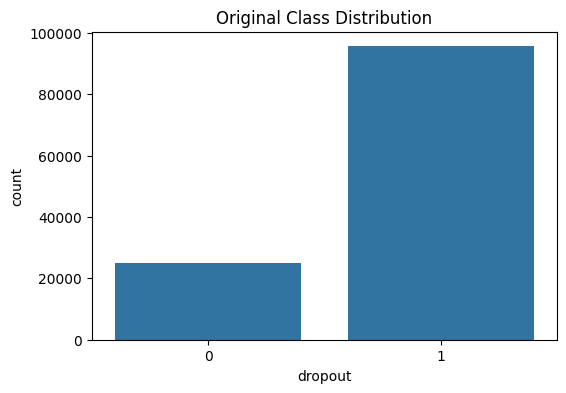

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()

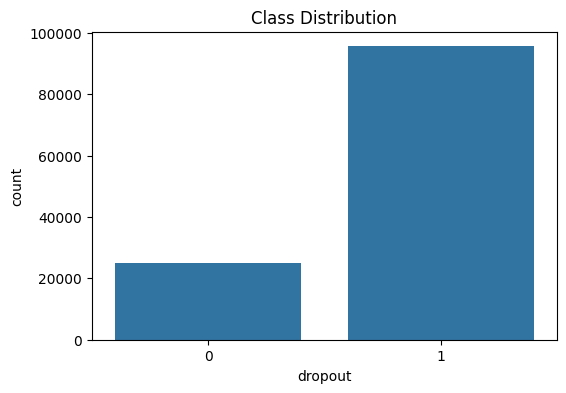

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:37:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Baseline XGBoost (Imbalanced):
[[ 2501  2491]
 [  898 18219]]
              precision    recall  f1-score   support

           0       0.74      0.50      0.60      4992
           1       0.88      0.95      0.91     19117

    accuracy                           0.86     24109
   macro avg       0.81      0.73      0.76     24109
weighted avg       0.85      0.86      0.85     24109



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:37:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Random Oversampling:
[[ 3456  1536]
 [ 2608 16509]]
              precision    recall  f1-score   support

           0       0.57      0.69      0.63      4992
           1       0.91      0.86      0.89     19117

    accuracy                           0.83     24109
   macro avg       0.74      0.78      0.76     24109
weighted avg       0.84      0.83      0.83     24109



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:37:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 SMOTE:
[[ 3187  1805]
 [ 2309 16808]]
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      4992
           1       0.90      0.88      0.89     19117

    accuracy                           0.83     24109
   macro avg       0.74      0.76      0.75     24109
weighted avg       0.84      0.83      0.83     24109

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:44:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
🔹 Tuned XGBoost (with SMOTE):
              precision    recall  f1-score   support

           0       0.58      0.66      0.62      4992
           1       0.91      0.88      0.89     19117

    accuracy                           0.83     24109
   macro avg       0.74      0.77      0.75     24109
weighted avg       0.84      0.83      0.84     24109



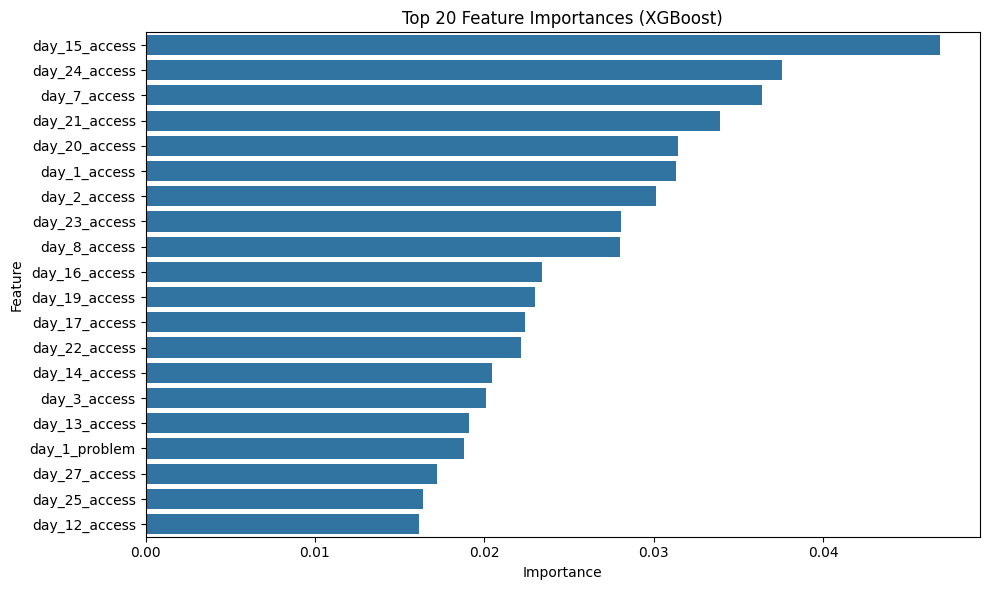

📊 Cross-Validation Results:
Baseline F1 Scores: [0.89685196 0.91651732 0.91182209]
Mean F1: 0.9084



ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 400, in _fit
    self._validate_steps()
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 273, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps of the chain should be estimators that implement fit and transform or fit_resample (but not both) or be a string 'passthrough' '<function resample at 0x7f8389c380e0>' (type <class 'function'>) doesn't)

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 400, in _fit
    self._validate_steps()
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 273, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps of the chain should be estimators that implement fit and transform or fit_resample (but not both) or be a string 'passthrough' '<function resample at 0x7e69dcea80e0>' (type <class 'function'>) doesn't)


In [9]:
# -------------------------------
# 📦 Step 1: Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# -------------------------------
# 📂 Step 2: Load & Preprocess Data
# -------------------------------
# Load dataset
df = pd.read_csv('model1_210_features.csv')

# Drop non-feature columns
X = df.drop(columns=['dropout', 'username', 'course_id', 'enrollment_id'])
y = df['dropout']

# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# -------------------------------
# ✂️ Step 3: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------------
# 🧪 Step 4: Baseline XGBoost
# -------------------------------
xgb_baseline = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_baseline.fit(X_train, y_train)
y_pred_base = xgb_baseline.predict(X_test)

print("🔹 Baseline XGBoost (Imbalanced):")
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

# -------------------------------
# 🔁 Step 5: Random Oversampling
# -------------------------------
train_data = pd.concat([X_train, y_train], axis=1)
majority = train_data[train_data.dropout == 1]
minority = train_data[train_data.dropout == 0]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
upsampled = pd.concat([majority, minority_upsampled])
X_train_up = upsampled.drop("dropout", axis=1)
y_train_up = upsampled["dropout"]

xgb_up = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_up.fit(X_train_up, y_train_up)
y_pred_up = xgb_up.predict(X_test)

print("🔹 Random Oversampling:")
print(confusion_matrix(y_test, y_pred_up))
print(classification_report(y_test, y_pred_up))

# -------------------------------
# 🧬 Step 6: SMOTE
# -------------------------------
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

xgb_sm = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = xgb_sm.predict(X_test)

print("🔹 SMOTE:")
print(confusion_matrix(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm))

# -------------------------------
# 🎯 Step 7: Hyperparameter Tuning with SMOTE
# -------------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)

best_xgb = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# Test predictions
y_pred_best = best_xgb.predict(X_test)
print("🔹 Tuned XGBoost (with SMOTE):")
print(classification_report(y_test, y_pred_best))

# -------------------------------
# 📈 Step 8: Feature Importance Plot
# -------------------------------
importances = best_xgb.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

# -------------------------------
# 🔄 Step 9: Cross-Validation Comparison
# -------------------------------
pipelines = {
    "Baseline": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Oversampling": ImbPipeline([
        ('resample', resample),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ]),
    "SMOTE": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}

print("📊 Cross-Validation Results:")
for name, model in pipelines.items():
    scores = cross_val_score(model, X, y, cv=3, scoring='f1', n_jobs=-1)
    print(f"{name} F1 Scores: {scores}")
    print(f"Mean F1: {scores.mean():.4f}\n")
